In [1]:
import torch
import numpy as np
import torch.optim as optim
torch.manual_seed(0)
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\Admin\anaconda3\envs\pytorch_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# scaling function for input data
def minmax_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator+1e-7)

In [3]:
# make dataset to input
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []

    for i in range(0,len(time_series)-seq_length):
        _x = time_series[i:i+seq_length,:]
        _y = time_series[i+seq_length,[-1]]# Next close price
        print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

In [4]:
#hyper parameters
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iteration = 500

In [6]:
# read training data 
df = pd.read_csv('Viet-Nam-Stock-Market-Prediction.csv')
xy = np.array(df[['open', 'high', 'low', 'volume', 'close']])
print(xy)

[[1.70500e+01 1.77000e+01 1.69000e+01 4.68096e+07 1.75500e+01]
 [1.75500e+01 1.79500e+01 1.74500e+01 2.33995e+07 1.77000e+01]
 [1.79000e+01 1.83500e+01 1.77000e+01 3.25536e+07 1.80000e+01]
 ...
 [7.49000e+01 7.63000e+01 7.43000e+01 5.47600e+05 7.60000e+01]
 [7.58000e+01 7.69000e+01 7.55000e+01 4.24400e+05 7.60000e+01]
 [7.61000e+01 7.69000e+01 7.48000e+01 5.64000e+05 7.48000e+01]]


In [7]:
#split train-test set
train_size = int(len(xy)* 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size-seq_length:]

In [8]:
#scaling data
train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

# make train-test dataset to input
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

# convert to tensor
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

[[0.04074955 0.04363208 0.04255319 0.46653991 0.04474474]
 [0.04372397 0.04510613 0.04593531 0.23165911 0.04564565]
 [0.04580607 0.04746462 0.04747264 0.32350504 0.04744745]
 [0.04669839 0.04805425 0.04839503 0.40728418 0.05015015]
 [0.05116002 0.05424528 0.05331448 0.35897881 0.05585586]
 [0.05829863 0.05955189 0.06038618 0.33493799 0.06006006]
 [0.05770375 0.05748821 0.05854138 0.27015993 0.05825826]] -> [0.05645646]
[[0.04372397 0.04510613 0.04593531 0.23165911 0.04564565]
 [0.04580607 0.04746462 0.04747264 0.32350504 0.04744745]
 [0.04669839 0.04805425 0.04839503 0.40728418 0.05015015]
 [0.05116002 0.05424528 0.05331448 0.35897881 0.05585586]
 [0.05829863 0.05955189 0.06038618 0.33493799 0.06006006]
 [0.05770375 0.05748821 0.05854138 0.27015993 0.05825826]
 [0.05710886 0.05748821 0.05792645 0.35702673 0.05645646]] -> [0.06006006]
[[0.04580607 0.04746462 0.04747264 0.32350504 0.04744745]
 [0.04669839 0.04805425 0.04839503 0.40728418 0.05015015]
 [0.05116002 0.05424528 0.05331448 0.3

 [0.15883403 0.16568396 0.16307957 0.20912931 0.16996997]] -> [0.17297297]
[[0.14455681 0.14858491 0.14770631 0.18106514 0.14954955]
 [0.14753123 0.14917453 0.15139589 0.14077638 0.14954955]
 [0.14931588 0.15330189 0.15447054 0.14699151 0.15735736]
 [0.14753123 0.15448113 0.14770631 0.21032127 0.14954955]
 [0.15348007 0.15389151 0.15201082 0.16508308 0.15555556]
 [0.15883403 0.16568396 0.16307957 0.20912931 0.16996997]
 [0.16835217 0.17040094 0.17230353 0.16619276 0.17297297]] -> [0.17177177]
[[0.14753123 0.14917453 0.15139589 0.14077638 0.14954955]
 [0.14931588 0.15330189 0.15447054 0.14699151 0.15735736]
 [0.14753123 0.15448113 0.14770631 0.21032127 0.14954955]
 [0.15348007 0.15389151 0.15201082 0.16508308 0.15555556]
 [0.15883403 0.16568396 0.16307957 0.20912931 0.16996997]
 [0.16835217 0.17040094 0.17230353 0.16619276 0.17297297]
 [0.16656752 0.16981132 0.17353339 0.13585905 0.17177177]] -> [0.17117117]
[[0.14931588 0.15330189 0.15447054 0.14699151 0.15735736]
 [0.14753123 0.154481

 [0.16954194 0.1692217  0.1716886  0.0769575  0.16786787]] -> [0.19339339]
[[0.16389054 0.16273585 0.16738409 0.06657503 0.16276276]
 [0.1600238  0.15801887 0.16430943 0.08303668 0.16156156]
 [0.15734682 0.15772406 0.16123478 0.05414677 0.16186186]
 [0.16240333 0.16420991 0.16646169 0.06583256 0.16726727]
 [0.16805473 0.16686321 0.17199606 0.10420797 0.17117117]
 [0.16954194 0.1692217  0.1716886  0.0769575  0.16786787]
 [0.18917311 0.1928066  0.19474849 0.17169107 0.19339339]] -> [0.19369369]
[[0.1600238  0.15801887 0.16430943 0.08303668 0.16156156]
 [0.15734682 0.15772406 0.16123478 0.05414677 0.16186186]
 [0.16240333 0.16420991 0.16646169 0.06583256 0.16726727]
 [0.16805473 0.16686321 0.17199606 0.10420797 0.17117117]
 [0.16954194 0.1692217  0.1716886  0.0769575  0.16786787]
 [0.18917311 0.1928066  0.19474849 0.17169107 0.19339339]
 [0.18798334 0.19162736 0.19505596 0.18384637 0.19369369]] -> [0.1963964]
[[0.15734682 0.15772406 0.16123478 0.05414677 0.16186186]
 [0.16240333 0.1642099

 [0.1154075  0.11615566 0.11941951 0.1641259  0.11951952]] -> [0.11741742]
[[0.10529447 0.1067217  0.10958062 0.16083899 0.10990991]
 [0.10886377 0.11143868 0.1132702  0.18767709 0.11291291]
 [0.11124331 0.11084906 0.11450006 0.13050953 0.11231231]
 [0.11124331 0.11261792 0.11572992 0.1912339  0.11531532]
 [0.11481261 0.11497642 0.11972697 0.17203516 0.11771772]
 [0.1154075  0.11615566 0.11941951 0.1641259  0.11951952]
 [0.11778703 0.11674528 0.12064937 0.13638981 0.11741742]] -> [0.11891892]
[[0.10886377 0.11143868 0.1132702  0.18767709 0.11291291]
 [0.11124331 0.11084906 0.11450006 0.13050953 0.11231231]
 [0.11124331 0.11261792 0.11572992 0.1912339  0.11531532]
 [0.11481261 0.11497642 0.11972697 0.17203516 0.11771772]
 [0.1154075  0.11615566 0.11941951 0.1641259  0.11951952]
 [0.11778703 0.11674528 0.12064937 0.13638981 0.11741742]
 [0.11362284 0.11556604 0.11757471 0.12585082 0.11891892]] -> [0.11741742]
[[0.11124331 0.11084906 0.11450006 0.13050953 0.11231231]
 [0.11124331 0.112617

 [0.13265913 0.13443396 0.13848235 0.06862082 0.13693694]] -> [0.14294294]
[[0.13831053 0.13885613 0.13971221 0.10444676 0.13663664]
 [0.13474123 0.13944575 0.14001968 0.13137115 0.14054054]
 [0.13652588 0.1379717  0.13848235 0.16004936 0.13453453]
 [0.13087448 0.13089623 0.13417784 0.09873179 0.13243243]
 [0.13265913 0.13590802 0.13786742 0.15637918 0.13453453]
 [0.13265913 0.13443396 0.13848235 0.06862082 0.13693694]
 [0.1374182  0.140625   0.14278686 0.18022334 0.14294294]] -> [0.14594595]
[[0.13474123 0.13944575 0.14001968 0.13137115 0.14054054]
 [0.13652588 0.1379717  0.13848235 0.16004936 0.13453453]
 [0.13087448 0.13089623 0.13417784 0.09873179 0.13243243]
 [0.13265913 0.13590802 0.13786742 0.15637918 0.13453453]
 [0.13265913 0.13443396 0.13848235 0.06862082 0.13693694]
 [0.1374182  0.140625   0.14278686 0.18022334 0.14294294]
 [0.14158239 0.14386792 0.14739884 0.20557049 0.14594595]] -> [0.14204204]
[[0.13652588 0.1379717  0.13848235 0.16004936 0.13453453]
 [0.13087448 0.130896

 [0.148721   0.15212264 0.15324068 0.03186579 0.14954955]] -> [0.14234234]
[[0.15645449 0.15919811 0.16307957 0.04360075 0.16276276]
 [0.16418798 0.16214623 0.16307957 0.04721977 0.16396396]
 [0.16299822 0.16273585 0.15262575 0.05676847 0.14954955]
 [0.15050565 0.15448113 0.15139589 0.0590962  0.15855856]
 [0.15585961 0.15566038 0.15877506 0.03461994 0.15525526]
 [0.148721   0.15212264 0.15324068 0.03186579 0.14954955]
 [0.14634146 0.14681604 0.13878982 0.0619276  0.14234234]] -> [0.14324324]
[[0.16418798 0.16214623 0.16307957 0.04721977 0.16396396]
 [0.16299822 0.16273585 0.15262575 0.05676847 0.14954955]
 [0.15050565 0.15448113 0.15139589 0.0590962  0.15855856]
 [0.15585961 0.15566038 0.15877506 0.03461994 0.15525526]
 [0.148721   0.15212264 0.15324068 0.03186579 0.14954955]
 [0.14634146 0.14681604 0.13878982 0.0619276  0.14234234]
 [0.14217728 0.14091981 0.14032714 0.02611269 0.14324324]] -> [0.13543544]
[[0.16299822 0.16273585 0.15262575 0.05676847 0.14954955]
 [0.15050565 0.154481

 [0.1522903  0.15625    0.15570041 0.11425232 0.15135135]] -> [0.14954955]
[[0.14455681 0.14829009 0.15016603 0.08586006 0.14954955]
 [0.14812612 0.14858491 0.15262575 0.06490649 0.15195195]
 [0.15169542 0.14976415 0.15447054 0.06144399 0.15135135]
 [0.148721   0.14799528 0.15385561 0.05056086 0.14954955]
 [0.14753123 0.14799528 0.15324068 0.06412891 0.15135135]
 [0.1522903  0.15625    0.15570041 0.11425232 0.15135135]
 [0.14812612 0.14711085 0.15170336 0.05576313 0.14954955]] -> [0.14354354]
[[0.14812612 0.14858491 0.15262575 0.06490649 0.15195195]
 [0.15169542 0.14976415 0.15447054 0.06144399 0.15135135]
 [0.148721   0.14799528 0.15385561 0.05056086 0.14954955]
 [0.14753123 0.14799528 0.15324068 0.06412891 0.15135135]
 [0.1522903  0.15625    0.15570041 0.11425232 0.15135135]
 [0.14812612 0.14711085 0.15170336 0.05576313 0.14954955]
 [0.14931588 0.14740566 0.14770631 0.06000722 0.14354354]] -> [0.14324324]
[[0.15169542 0.14976415 0.15447054 0.06144399 0.15135135]
 [0.148721   0.147995

 [0.07376562 0.07370283 0.07114746 0.02777822 0.07357357]] -> [0.07117117]
[[0.07852469 0.07724057 0.07944902 0.05018863 0.07957958]
 [0.07822725 0.07959906 0.0769893  0.03534033 0.07957958]
 [0.07614515 0.07665094 0.07729677 0.03648613 0.07657658]
 [0.07525283 0.07488208 0.07084    0.04517899 0.07147147]
 [0.07495538 0.07370283 0.07391465 0.03724465 0.07447447]
 [0.07376562 0.07370283 0.07114746 0.02777822 0.07357357]
 [0.07198096 0.07075472 0.07206986 0.02350002 0.07117117]] -> [0.06966967]
[[0.07822725 0.07959906 0.0769893  0.03534033 0.07957958]
 [0.07614515 0.07665094 0.07729677 0.03648613 0.07657658]
 [0.07525283 0.07488208 0.07084    0.04517899 0.07147147]
 [0.07495538 0.07370283 0.07391465 0.03724465 0.07447447]
 [0.07376562 0.07370283 0.07114746 0.02777822 0.07357357]
 [0.07198096 0.07075472 0.07206986 0.02350002 0.07117117]
 [0.06484236 0.06839623 0.06776534 0.03112534 0.06966967]] -> [0.07687688]
[[0.07614515 0.07665094 0.07729677 0.03648613 0.07657658]
 [0.07525283 0.074882

 [0.58953004 0.59964623 0.60828926 0.06832183 0.5957958 ]] -> [0.25045045]
[[0.54610351 0.55188679 0.56524413 0.01810009 0.55975976]
 [0.55562165 0.55778302 0.57200836 0.03051029 0.56276276]
 [0.55800119 0.55660377 0.56954864 0.02835213 0.55975976]
 [0.553837   0.55542453 0.57016357 0.0172884  0.56336336]
 [0.55800119 0.58785377 0.57631288 0.07736886 0.58678679]
 [0.58953004 0.59964623 0.60828926 0.06832183 0.5957958 ]
 [0.24509221 0.24941038 0.25162957 0.03079925 0.25045045]] -> [0.24804805]
[[0.55562165 0.55778302 0.57200836 0.03051029 0.56276276]
 [0.55800119 0.55660377 0.56954864 0.02835213 0.55975976]
 [0.553837   0.55542453 0.57016357 0.0172884  0.56336336]
 [0.55800119 0.58785377 0.57631288 0.07736886 0.58678679]
 [0.58953004 0.59964623 0.60828926 0.06832183 0.5957958 ]
 [0.24509221 0.24941038 0.25162957 0.03079925 0.25045045]
 [0.24628197 0.24823113 0.25347436 0.03221194 0.24804805]] -> [0.25105105]
[[0.55800119 0.55660377 0.56954864 0.02835213 0.55975976]
 [0.553837   0.555424

 [0.58715051 0.59964623 0.60521461 0.03735803 0.6048048 ]] -> [0.5987988]
[[0.17251636 0.17158019 0.17937523 0.00387988 0.17477477]
 [0.1728138  0.17482311 0.17999016 0.01106072 0.17897898]
 [0.17727543 0.17629717 0.18275735 0.00929687 0.17867868]
 [0.17727543 0.18514151 0.18398721 0.03606774 0.18858859]
 [0.59190958 0.58667453 0.60890419 0.02015847 0.5957958 ]
 [0.58715051 0.59964623 0.60521461 0.03735803 0.6048048 ]
 [0.59964307 0.59551887 0.61382364 0.02621303 0.5987988 ]] -> [0.6024024]
[[0.1728138  0.17482311 0.17999016 0.01106072 0.17897898]
 [0.17727543 0.17629717 0.18275735 0.00929687 0.17867868]
 [0.17727543 0.18514151 0.18398721 0.03606774 0.18858859]
 [0.59190958 0.58667453 0.60890419 0.02015847 0.5957958 ]
 [0.58715051 0.59964623 0.60521461 0.03735803 0.6048048 ]
 [0.59964307 0.59551887 0.61382364 0.02621303 0.5987988 ]
 [0.59369423 0.59257075 0.61382364 0.02596019 0.6024024 ]] -> [0.61201201]
[[0.17727543 0.17629717 0.18275735 0.00929687 0.17867868]
 [0.17727543 0.18514151

 [0.23616895 0.23466981 0.24240561 0.00655747 0.23693694]] -> [0.23783784]
[[0.23319453 0.23349057 0.23687123 0.01489846 0.23063063]
 [0.23081499 0.22995283 0.23687123 0.00992345 0.23243243]
 [0.23170732 0.23319575 0.23994589 0.00848417 0.23693694]
 [0.23468174 0.23466981 0.23810109 0.00445078 0.23183183]
 [0.22813801 0.23113208 0.2371787  0.00488221 0.23663664]
 [0.23616895 0.23466981 0.24240561 0.00655747 0.23693694]
 [0.23676383 0.23408019 0.24302054 0.00793635 0.23783784]] -> [0.24444444]
[[0.23081499 0.22995283 0.23687123 0.00992345 0.23243243]
 [0.23170732 0.23319575 0.23994589 0.00848417 0.23693694]
 [0.23468174 0.23466981 0.23810109 0.00445078 0.23183183]
 [0.22813801 0.23113208 0.2371787  0.00488221 0.23663664]
 [0.23616895 0.23466981 0.24240561 0.00655747 0.23693694]
 [0.23676383 0.23408019 0.24302054 0.00793635 0.23783784]
 [0.23557406 0.24056604 0.2442504  0.01013766 0.24444444]] -> [0.24624625]
[[0.23170732 0.23319575 0.23994589 0.00848417 0.23693694]
 [0.23468174 0.234669

 [0.89113623 0.91686321 0.89177223 0.01403359 0.93513513]] -> [0.97537537]
[[0.81380131 0.84669811 0.84257779 0.00914035 0.85225225]
 [0.84354551 0.8384434  0.86410036 0.00608721 0.84684685]
 [0.83759667 0.86497641 0.86717501 0.00655677 0.88108108]
 [0.89708507 0.92393868 0.92866806 0.02176927 0.93933934]
 [0.94170137 0.94575472 0.89177223 0.0272809  0.87027027]
 [0.89113623 0.91686321 0.89177223 0.01403359 0.93513513]
 [0.96252231 0.97228774 0.96863854 0.01667536 0.97537537]] -> [0.9993994]
[[0.84354551 0.8384434  0.86410036 0.00608721 0.84684685]
 [0.83759667 0.86497641 0.86717501 0.00655677 0.88108108]
 [0.89708507 0.92393868 0.92866806 0.02176927 0.93933934]
 [0.94170137 0.94575472 0.89177223 0.0272809  0.87027027]
 [0.89113623 0.91686321 0.89177223 0.01403359 0.93513513]
 [0.96252231 0.97228774 0.96863854 0.01667536 0.97537537]
 [0.96311719 1.         0.99508056 0.02958723 0.9993994 ]] -> [1.]
[[0.83759667 0.86497641 0.86717501 0.00655677 0.88108108]
 [0.89708507 0.92393868 0.9286

 [0.45778146 0.44715447 0.46470588 0.00941633 0.45075603]] -> [0.4589293]
[[0.45612583 0.46341463 0.46386555 0.03160503 0.44748672]
 [0.4660596  0.45609756 0.46470588 0.01451511 0.45484266]
 [0.45281457 0.45284553 0.43277311 0.00891246 0.45402534]
 [0.46192053 0.45528455 0.46890756 0.01324388 0.45484266]
 [0.47847682 0.46747967 0.42521008 0.01896209 0.45075603]
 [0.45778146 0.44715447 0.46470588 0.00941633 0.45075603]
 [0.45778146 0.45853658 0.46638655 0.01672473 0.4589293 ]] -> [0.48508378]
[[0.4660596  0.45609756 0.46470588 0.01451511 0.45484266]
 [0.45281457 0.45284553 0.43277311 0.00891246 0.45402534]
 [0.46192053 0.45528455 0.46890756 0.01324388 0.45484266]
 [0.47847682 0.46747967 0.42521008 0.01896209 0.45075603]
 [0.45778146 0.44715447 0.46470588 0.00941633 0.45075603]
 [0.45778146 0.45853658 0.46638655 0.01672473 0.4589293 ]
 [0.47019868 0.48943089 0.48319328 0.04170551 0.48508378]] -> [0.4859011]
[[0.45281457 0.45284553 0.43277311 0.00891246 0.45402534]
 [0.46192053 0.45528455

 [0.02400662 0.02845528 0.02857143 0.06107902 0.02084185]] -> [0.02084185]
[[0.03228477 0.03130081 0.03193277 0.04072551 0.02983245]
 [0.03145695 0.03780488 0.03697479 0.06895601 0.03759706]
 [0.03932119 0.0495935  0.04537815 0.08320762 0.05026563]
 [0.05298013 0.05121951 0.04663866 0.0580142  0.04454434]
 [0.04139073 0.04471545 0.04201681 0.0685862  0.04004904]
 [0.02400662 0.02845528 0.02857143 0.06107902 0.02084185]
 [0.00910596 0.03739837 0.01512605 0.05225439 0.02084185]] -> [0.0044953]
[[0.03145695 0.03780488 0.03697479 0.06895601 0.03759706]
 [0.03932119 0.0495935  0.04537815 0.08320762 0.05026563]
 [0.05298013 0.05121951 0.04663866 0.0580142  0.04454434]
 [0.04139073 0.04471545 0.04201681 0.0685862  0.04004904]
 [0.02400662 0.02845528 0.02857143 0.06107902 0.02084185]
 [0.00910596 0.03739837 0.01512605 0.05225439 0.02084185]
 [0.02400662 0.02195122 0.01092437 0.06520242 0.0044953 ]] -> [0.00980793]
[[0.03932119 0.0495935  0.04537815 0.08320762 0.05026563]
 [0.05298013 0.0512195

 [0.48427152 0.47317073 0.48403361 0.02390832 0.46546792]] -> [0.47118921]
[[0.52400662 0.51219512 0.51428571 0.11175708 0.50306498]
 [0.50331126 0.49593496 0.49327731 0.11999002 0.47527585]
 [0.48261589 0.4796748  0.4815126  0.04567636 0.46138128]
 [0.47847682 0.4699187  0.47478992 0.04212155 0.46301594]
 [0.47102649 0.4699187  0.48319328 0.01787577 0.47364119]
 [0.48427152 0.47317073 0.48403361 0.02390832 0.46546792]
 [0.47268212 0.46829268 0.48319328 0.03498881 0.47118921]] -> [0.47527585]
[[0.50331126 0.49593496 0.49327731 0.11999002 0.47527585]
 [0.48261589 0.4796748  0.4815126  0.04567636 0.46138128]
 [0.47847682 0.4699187  0.47478992 0.04212155 0.46301594]
 [0.47102649 0.4699187  0.48319328 0.01787577 0.47364119]
 [0.48427152 0.47317073 0.48403361 0.02390832 0.46546792]
 [0.47268212 0.46829268 0.48319328 0.03498881 0.47118921]
 [0.49006622 0.4796748  0.49327731 0.03664972 0.47527585]] -> [0.49080507]
[[0.48261589 0.4796748  0.4815126  0.04567636 0.46138128]
 [0.47847682 0.469918

 [0.66804636 0.65365854 0.6512605  0.00522821 0.62811606]] -> [0.63138537]
[[0.69784768 0.68292683 0.70168067 0.01166756 0.6861463 ]
 [0.69370861 0.68211382 0.70336134 0.01397888 0.68369432]
 [0.69370861 0.67886179 0.68487395 0.01596662 0.68369432]
 [0.69370861 0.67886179 0.68907563 0.01531483 0.67552105]
 [0.68377483 0.66910569 0.65966386 0.01581407 0.6591745 ]
 [0.66804636 0.65365854 0.6512605  0.00522821 0.62811606]
 [0.63741722 0.63170732 0.6512605  0.01609143 0.63138537]] -> [0.63383735]
[[0.69370861 0.68211382 0.70336134 0.01397888 0.68369432]
 [0.69370861 0.67886179 0.68487395 0.01596662 0.68369432]
 [0.69370861 0.67886179 0.68907563 0.01531483 0.67552105]
 [0.68377483 0.66910569 0.65966386 0.01581407 0.6591745 ]
 [0.66804636 0.65365854 0.6512605  0.00522821 0.62811606]
 [0.63741722 0.63170732 0.6512605  0.01609143 0.63138537]
 [0.64072848 0.63170732 0.64957983 0.01934115 0.63383735]] -> [0.63792399]
[[0.69370861 0.67886179 0.68487395 0.01596662 0.68369432]
 [0.69370861 0.678861

 [0.21357616 0.21138211 0.22268908 0.03010729 0.2137311 ]] -> [0.2137311]
[[0.23509934 0.22845528 0.21848739 0.03595494 0.2137311 ]
 [0.21771523 0.21138211 0.21848739 0.02177266 0.21291377]
 [0.21771523 0.21951219 0.22605042 0.02053379 0.21781774]
 [0.21688742 0.21219512 0.21176471 0.05965987 0.20964446]
 [0.21109272 0.20650406 0.21428571 0.0368656  0.20882714]
 [0.21357616 0.21138211 0.22268908 0.03010729 0.2137311 ]
 [0.21771523 0.21219512 0.22352941 0.02039049 0.2137311 ]] -> [0.20882714]
[[0.21771523 0.21138211 0.21848739 0.02177266 0.21291377]
 [0.21771523 0.21951219 0.22605042 0.02053379 0.21781774]
 [0.21688742 0.21219512 0.21176471 0.05965987 0.20964446]
 [0.21109272 0.20650406 0.21428571 0.0368656  0.20882714]
 [0.21357616 0.21138211 0.22268908 0.03010729 0.2137311 ]
 [0.21771523 0.21219512 0.22352941 0.02039049 0.2137311 ]
 [0.21523179 0.21138211 0.2210084  0.0226787  0.20882714]] -> [0.20065386]
[[0.21771523 0.21951219 0.22605042 0.02053379 0.21781774]
 [0.21688742 0.2121951

In [9]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers = layers, batch_first = True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias = True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x[:,-1])
        return x

In [10]:
net = Net(data_dim, hidden_dim, output_dim, 1)

In [11]:
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr = learning_rate)

In [13]:
for i in range(iteration):
    optimizer.zero_grad()
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)
    loss.backward()
    optimizer.step()
    print(i, loss.item())


0 0.0004978651413694024
1 0.0004977500648237765
2 0.0004976354539394379
3 0.0004975213669240475
4 0.0004974078619852662
5 0.0004972947645001113
6 0.0004971821908839047
7 0.0004970701411366463
8 0.0004969585570506752
9 0.0004968474386259913
10 0.0004967369022779167
11 0.0004966268315911293
12 0.0004965172847732902
13 0.0004964082618243992
14 0.0004962996463291347
15 0.0004961916129104793
16 0.0004960839869454503
17 0.0004959768848493695
18 0.000495870248414576
19 0.0004957641358487308
20 0.0004956586053594947
21 0.000495553424116224
22 0.0004954488249495625
23 0.0004953446914441884
24 0.0004952410236001015
25 0.0004951378796249628
26 0.0004950352595187724
27 0.0004949330468662083
28 0.0004948313580825925
29 0.000494730076752603
30 0.0004946293192915618
31 0.0004945291439071298
32 0.0004944293759763241
33 0.0004943300737068057
34 0.0004942312370985746
35 0.0004941329243592918
36 0.0004940351354889572
37 0.000493937695864588
38 0.000493840838316828
39 0.0004937443882226944
40 0.0004936484

323 0.0004804587224498391
324 0.00048044195864349604
325 0.00048042525304481387
326 0.00048040866386145353
327 0.0004803921328857541
328 0.0004803757183253765
329 0.00048035933286882937
330 0.0004803431511390954
331 0.000480326940305531
332 0.00048031090409494936
333 0.0004802948678843677
334 0.00048027894808910787
335 0.0004802631156053394
336 0.0004802473122254014
337 0.0004802316543646157
338 0.0004802160838153213
339 0.00048020060057751834
340 0.0004801852337550372
341 0.0004801698087248951
342 0.0004801545583177358
343 0.000480139278806746
344 0.00048012426123023033
345 0.0004801091563422233
346 0.000480094226077199
347 0.00048007923760451376
348 0.0004800644819624722
349 0.00048004972632043064
350 0.0004800350870937109
351 0.00048002044786699116
352 0.0004800058959517628
353 0.0004799914313480258
354 0.00047997705405578017
355 0.00047996267676353455
356 0.00047994835767894983
357 0.0004799342714250088
358 0.0004799201269634068
359 0.00047990604070946574
360 0.00047989204176701605

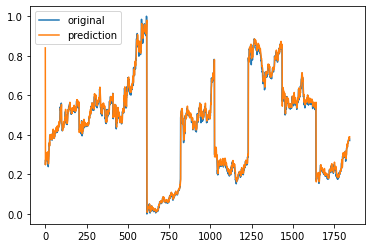

In [14]:
plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()